# The Image Classification Dataset

For over a decate, MNIST served as the point of reference for comparing machine learning algorithms. While it had a good run as a benchmark dataset, even simple models by today's standards achieve classification accuracy over 95%, making it unsuitable for distinguishing between stronger models and weaker ones. Even more so, the dataset allows for very high levles of accuracy, not typically seen in many classification problems. Today MNIST serves as more of sanity checks than as a benchmark. ImageNet poses a much more relevant challenge. As a substitute we will use Fashion-MNIST dataset because of its size. It contains images of 10 categories of clothing at 28 x 28 pixels resolution.

In [1]:
%matplotlib inline
import time
import torch 
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

## Loading the Dataset

Because of its popularity most of the major frameworks provide preprocessed versions of it. 

In [14]:
class FashionMNIST(d2l.DataModule): #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize), 
                                   transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

Checking the __torchvision__, and __tranforms__ to understand how the train set and the validation set were created. _Time to read the documentation!_. 

In [5]:
dir(torchvision)

['_HAS_OPS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_image_backend',
 '_internally_replaced_utils',
 '_is_tracing',
 '_utils',
 '_video_backend',
 'datasets',
 'extension',
 'get_image_backend',
 'get_video_backend',
 'io',
 'models',
 'ops',
 'os',
 'set_image_backend',
 'set_video_backend',
 'torch',
 'transforms',
 'utils',
 'version',
 'warnings']

In [6]:
dir(torchvision.transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

Now let's check the documentation:

In [7]:
help(torchvision.transforms.Compose)

Help on class Compose in module torchvision.transforms.transforms:

class Compose(builtins.object)
 |  Compose(transforms)
 |  
 |  Composes several transforms together. This transform does not support torchscript.
 |  Please, see the note below.
 |  
 |  Args:
 |      transforms (list of ``Transform`` objects): list of transforms to compose.
 |  
 |  Example:
 |      >>> transforms.Compose([
 |      >>>     transforms.CenterCrop(10),
 |      >>>     transforms.PILToTensor(),
 |      >>>     transforms.ConvertImageDtype(torch.float),
 |      >>> ])
 |  
 |  .. note::
 |      In order to script the transformations, please use ``torch.nn.Sequential`` as below.
 |  
 |      >>> transforms = torch.nn.Sequential(
 |      >>>     transforms.CenterCrop(10),
 |      >>>     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
 |      >>> )
 |      >>> scripted_transforms = torch.jit.script(transforms)
 |  
 |      Make sure to use only scriptable transformations, i.e. that work 

In [8]:
help(torchvision.transforms.Resize)

Help on class Resize in module torchvision.transforms.transforms:

class Resize(torch.nn.modules.module.Module)
 |  Resize(size, interpolation=<InterpolationMode.BILINEAR: 'bilinear'>, max_size=None, antialias=None)
 |  
 |  Resize the input image to the given size.
 |  If the image is torch Tensor, it is expected
 |  to have [..., H, W] shape, where ... means an arbitrary number of leading dimensions
 |  
 |  .. warning::
 |      The output image might be different depending on its type: when downsampling, the interpolation of PIL images
 |      and tensors is slightly different, because PIL applies antialiasing. This may lead to significant differences
 |      in the performance of a network. Therefore, it is preferable to train and serve a model with the same input
 |      types. See also below the ``antialias`` parameter, which can help making the output of PIL images and tensors
 |      closer.
 |  
 |  Args:
 |      size (sequence or int): Desired output size. If size is a sequen

In [9]:
help(torchvision.transforms.ToTensor)

Help on class ToTensor in module torchvision.transforms.transforms:

class ToTensor(builtins.object)
 |  ToTensor() -> None
 |  
 |  Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor. This transform does not support torchscript.
 |  
 |  Converts a PIL Image or numpy.ndarray (H x W x C) in the range
 |  [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
 |  if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1)
 |  or if the numpy.ndarray has dtype = np.uint8
 |  
 |  In the other cases, tensors are returned without scaling.
 |  
 |  .. note::
 |      Because the input image is scaled to [0.0, 1.0], this transformation should not be used when
 |      transforming target image masks. See the `references`_ for implementing the transforms for image masks.
 |  
 |  .. _references: https://github.com/pytorch/vision/tree/main/references/segmentation
 |  
 |  Methods defined here:
 |  
 |  __call__(self, pic)
 |      Args:
 |   

In [10]:
help(torchvision.datasets.FashionMNIST)

Help on class FashionMNIST in module torchvision.datasets.mnist:

class FashionMNIST(MNIST)
 |  FashionMNIST(root: str, train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |  
 |  `Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.
 |  
 |  Args:
 |      root (string): Root directory of dataset where ``FashionMNIST/raw/train-images-idx3-ubyte``
 |          and  ``FashionMNIST/raw/t10k-images-idx3-ubyte`` exist.
 |      train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
 |          otherwise from ``t10k-images-idx3-ubyte``.
 |      download (bool, optional): If True, downloads the dataset from the internet and
 |          puts it in root directory. If dataset is already downloaded, it is not
 |          downloaded again.
 |      transform (callable, optional): A function/transform that  takes in an PIL image
 |          and returns a transformed ve

OK back to coding.

In [15]:
data = FashionMNIST(resize=(32, 32))
print(f" FashionMNIST in total has {len(data.train)} images used for training,and {len(data.val)} for validation or test set")

 FashionMNIST in total has 60000 images used for training,and 10000 for validation or test set


by convention we store image as _c x h x w_ tensor, where _c_ is the number of color channels, _h_ is the height and _w_ is the width.

In [16]:
dir(data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'batch_size',
 'get_dataloader',
 'get_tensorloader',
 'hparams',
 'num_workers',
 'resize',
 'root',
 'save_hyperparameters',
 'train',
 'train_dataloader',
 'val',
 'val_dataloader']

In [17]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [19]:

@d2l.add_to_class(FashionMNIST)  #@save
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

## Reading a Minibatch

In [20]:
@d2l.add_to_class(FashionMNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

In [21]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


let's look at the time it takes to read the images:

In [22]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'4.00 sec'

## Visualization

In [23]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    raise NotImplementedError

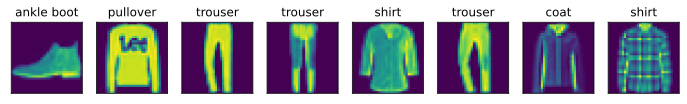

In [24]:
@d2l.add_to_class(FashionMNIST)  #@save
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)